In [2]:
import pandas as pd
import math
import numpy as np
import scipy
import os
import seaborn as sns
from scipy.stats import binom, hypergeom
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [3]:
master_df = pd.read_csv('flatiron_mod3proj/master_final.csv')
print(master_df.shape)
master_df.head()

(1421, 27)


,Unnamed: 0,recipient_parent_name1,current_award,potential_award,offers_received,num_employees,annual_revenue,award_count,recipient_name,organizational_type,...,Republicans,Soft_Indivs,Soft_Orgs,Total,Total1,org_id,org_name,org_name_clean,DemShare,RepShare
0,0,3MCOMPANY,7.838262e+06,4.342798e+07,18310,2.854455e+06,1.030000e+12,1,3M COMPANY,NaN,...,257681,0,0,438175,438175,D000021800,3M CO,3m,0.411922,0.588078
1,1,ABBLTD,3.163537e+05,3.163537e+05,5,2.164675e+04,6.203500e+09,1,ABB LTD,CORPORATE NOT TAX EXEMPT,...,10850,0,0,21536,21536,D000023729,ABB GROUP,abb,0.496192,0.503808
2,2,ABBOTTLABORATORIES,2.329304e+07,6.244787e+07,149,5.342950e+04,1.786237e+09,1,ABBOTT LABORATORIES,NaN,...,709850,5000,0,1285641,1285641,D000000383,ABBOTT LABORATORIES,abbott laboratories,0.447863,0.552137
3,3,ADVANCEDACOUSTICCONCEPTSINC,2.627054e+07,5.877078e+07,5,2.000000e+02,2.691478e+07,1,ADVANCED ACOUSTIC CONCEPTS INC.,CORPORATE NOT TAX EXEMPT,...,23300,0,0,142850,142850,D000023762,ADVANCED ACOUSTIC CONCEPTS,advanced acoustic concepts,0.836892,0.163108
4,4,AFOGNAKNATIVECORPORATION,4.654850e+08,1.040796e+09,430,4.909336e+02,1.786700e+07,1,AFOGNAK NATIVE CORPORATION,NaN,...,3750,0,0,9820,9820,D000023779,AFOGNAK NATIVE CORP,afognak native,0.618126,0.381874


In [4]:
master_df = master_df[[
#  'Unnamed: 0',
 'recipient_parent_name1',
 'recipient_name_clean',
 'recipient_name',
 'org_name_clean',
 'org_name',
 'current_award',
 'potential_award',
#  'offers_received',
 'num_employees',
 'annual_revenue',
#  'award_count',
#  'organizational_type',
#  'business_size',
 'year',
#  'Cycle',
 'Democrats',
 'Republicans',
#  'Individuals',
 'PACs',
#  'Soft_Indivs',
 'Soft_Orgs',
#  'Total',
 'Total1',
#  'org_id',
#  'DemShare',
#  'RepShare'
]]

In [5]:
print(master_df.shape)
master_df.head()

(1421, 15)


,recipient_parent_name1,recipient_name_clean,recipient_name,org_name_clean,org_name,current_award,potential_award,num_employees,annual_revenue,year,Democrats,Republicans,PACs,Soft_Orgs,Total1
0,3MCOMPANY,3m,3M COMPANY,3m,3M CO,7.838262e+06,4.342798e+07,2.854455e+06,1.030000e+12,2008,180494,257681,284404,0,438175
1,ABBLTD,abb,ABB LTD,abb,ABB GROUP,3.163537e+05,3.163537e+05,2.164675e+04,6.203500e+09,2008,10686,10850,18000,0,21536
2,ABBOTTLABORATORIES,abbott laboratories,ABBOTT LABORATORIES,abbott laboratories,ABBOTT LABORATORIES,2.329304e+07,6.244787e+07,5.342950e+04,1.786237e+09,2008,575791,709850,1028497,0,1285641
3,ADVANCEDACOUSTICCONCEPTSINC,advanced acoustic concepts,ADVANCED ACOUSTIC CONCEPTS INC.,advanced acoustic concepts,ADVANCED ACOUSTIC CONCEPTS,2.627054e+07,5.877078e+07,2.000000e+02,2.691478e+07,2008,119550,23300,107600,0,142850
4,AFOGNAKNATIVECORPORATION,afognak native,AFOGNAK NATIVE CORPORATION,afognak native,AFOGNAK NATIVE CORP,4.654850e+08,1.040796e+09,4.909336e+02,1.786700e+07,2008,6070,3750,6000,0,9820


Add `PACs` and `Soft_orgs`

In [6]:
master_df['pacs_plus_softorgs'] = master_df.PACs + master_df.Soft_Orgs
print(master_df.shape)
master_df.head()

(1421, 16)


,recipient_parent_name1,recipient_name_clean,recipient_name,org_name_clean,org_name,current_award,potential_award,num_employees,annual_revenue,year,Democrats,Republicans,PACs,Soft_Orgs,Total1,pacs_plus_softorgs
0,3MCOMPANY,3m,3M COMPANY,3m,3M CO,7.838262e+06,4.342798e+07,2.854455e+06,1.030000e+12,2008,180494,257681,284404,0,438175,284404
1,ABBLTD,abb,ABB LTD,abb,ABB GROUP,3.163537e+05,3.163537e+05,2.164675e+04,6.203500e+09,2008,10686,10850,18000,0,21536,18000
2,ABBOTTLABORATORIES,abbott laboratories,ABBOTT LABORATORIES,abbott laboratories,ABBOTT LABORATORIES,2.329304e+07,6.244787e+07,5.342950e+04,1.786237e+09,2008,575791,709850,1028497,0,1285641,1028497
3,ADVANCEDACOUSTICCONCEPTSINC,advanced acoustic concepts,ADVANCED ACOUSTIC CONCEPTS INC.,advanced acoustic concepts,ADVANCED ACOUSTIC CONCEPTS,2.627054e+07,5.877078e+07,2.000000e+02,2.691478e+07,2008,119550,23300,107600,0,142850,107600
4,AFOGNAKNATIVECORPORATION,afognak native,AFOGNAK NATIVE CORPORATION,afognak native,AFOGNAK NATIVE CORP,4.654850e+08,1.040796e+09,4.909336e+02,1.786700e+07,2008,6070,3750,6000,0,9820,6000


#### Scale `current_award`

In [7]:
master_df['current_award_scaled'] = master_df.current_award/100
master_df['soft_dummy'] = (master_df.Soft_Orgs > 0).astype(int)
master_df['current_award_scaled_log'] = np.log(master_df.current_award_scaled)
master_df['pacs_plus_softorgs_log'] = np.log(master_df.pacs_plus_softorgs)

In [8]:
def soft_size_or_50(x):
    if x > 0:
        return max(50, x/1000)
    else:
        return 50

In [9]:
master_df[master_df.Soft_Orgs.apply(soft_size_or_50) > 50]

,recipient_parent_name1,recipient_name_clean,recipient_name,org_name_clean,org_name,current_award,potential_award,num_employees,annual_revenue,year,Democrats,Republicans,PACs,Soft_Orgs,Total1,pacs_plus_softorgs,current_award_scaled,soft_dummy,current_award_scaled_log,pacs_plus_softorgs_log
227,CITIGROUPINC,citigroup,CITIGROUP INC.,citigroup,CITIGROUP INC,1.830602e+08,1.866840e+08,2696.352569,4.882443e+09,2010,606690,867093,619000,54776,1473783,673776,1.830602e+06,1,14.420156,13.420653
452,CHEVRONCORPORATION,chevron,CHEVRON CORPORATION,chevron,CHEVRON,6.830565e+06,1.101248e+07,38548.484850,1.096530e+11,2012,239887,1447424,697000,2500000,1687311,3197000,6.830565e+04,1,11.131748,14.977723
686,CHEVRONCORPORATION,chevron,CHEVRON CORPORATION,chevron,CHEVRON,2.662849e+08,8.003950e+08,44390.189170,1.330000e+11,2014,213362,932185,752750,1000000,1145547,1752750,2.662849e+06,1,14.794907,14.376697
785,NEXTERAENERGYINC,nextera energy,NEXTERA ENERGY INC.,nextera energy,NEXTERA ENERGY,2.960748e+07,3.083556e+07,15654.333330,1.573333e+10,2014,410900,665880,784900,100000,1076780,884900,2.960748e+05,1,12.598368,13.693230
916,CHEVRONCORPORATION,chevron,CHEVRON CORPORATION,chevron,CHEVRON,2.593238e+07,2.212752e+08,61472.096110,2.380000e+11,2016,489301,1385438,775250,3335000,1874739,4110250,2.593238e+05,1,12.465833,15.228994
940,DUKEENERGYCORPORATION,duke energy,DUKE ENERGY CORPORATION,duke energy,DUKE ENERGY,2.032935e+08,2.037368e+08,14705.618080,1.772693e+10,2016,308946,942281,1057950,250000,1251227,1307950,2.032935e+06,1,14.524991,14.083972
967,THEGEOGROUPINC,geo,THE GEO GROUP INC,geo,GEO GROUP,4.402679e+09,1.524973e+10,10039.223990,1.103960e+09,2016,70359,455997,351845,770000,526356,1121845,4.402679e+07,1,17.600309,13.930485
1020,NEXTERAENERGYINC,nextera energy,NEXTERA ENERGY INC.,nextera energy,NEXTERA ENERGY,6.000000e+05,6.000000e+05,11523.809520,1.006667e+10,2016,407962,1148182,1044350,2260000,1556144,3304350,6.000000e+03,1,8.699515,15.010750
1063,STARR,starr,STARR,starr,STARR COMPANIES,1.737268e+07,1.737268e+07,10.000000,3.000000e+06,2016,11375,70861,56700,15240000,82236,15296700,1.737268e+05,1,12.065239,16.543148
1081,THESOUTHERNCOMPANY,southern,THE SOUTHERN COMPANY,southern,SOUTHERN CO,9.074785e+07,9.299493e+07,10282.153040,7.257603e+09,2016,305450,1186798,1219250,54000,1492248,1273250,9.074785e+05,1,13.718425,14.057083


In [10]:
master_df['soft_dummy_size'] = master_df.Soft_Orgs.apply(soft_size_or_50)

In [11]:
top_100 = list(master_df.groupby('org_name_clean')['current_award'].sum().sort_values(ascending=False).reset_index()['org_name_clean'].values)[:100]
len(top_100)

100

In [12]:
input_data = master_df[['org_name_clean', 'year', 'current_award_scaled', 'pacs_plus_softorgs', 'num_employees', 'annual_revenue', 'Soft_Orgs', 'soft_dummy', 'pacs_plus_softorgs_log', 'current_award_scaled_log', 'soft_dummy_size']]
# input_data = input_data[input_data.org_name_clean.isin(top_100)]  # top 100
print(input_data.shape)
input_data.head()

(1421, 11)


,org_name_clean,year,current_award_scaled,pacs_plus_softorgs,num_employees,annual_revenue,Soft_Orgs,soft_dummy,pacs_plus_softorgs_log,current_award_scaled_log,soft_dummy_size
0,3m,2008,7.838262e+04,284404,2.854455e+06,1.030000e+12,0,0,12.558151,11.269358,50.0
1,abb,2008,3.163537e+03,18000,2.164675e+04,6.203500e+09,0,0,9.798127,8.059446,50.0
2,abbott laboratories,2008,2.329304e+05,1028497,5.342950e+04,1.786237e+09,0,0,13.843609,12.358495,50.0
3,advanced acoustic concepts,2008,2.627055e+05,107600,2.000000e+02,2.691478e+07,0,0,11.586176,12.478789,50.0
4,afognak native,2008,4.654850e+06,6000,4.909336e+02,1.786700e+07,0,0,8.699515,15.353420,50.0


#### Save image below for each year (and record gif manually)

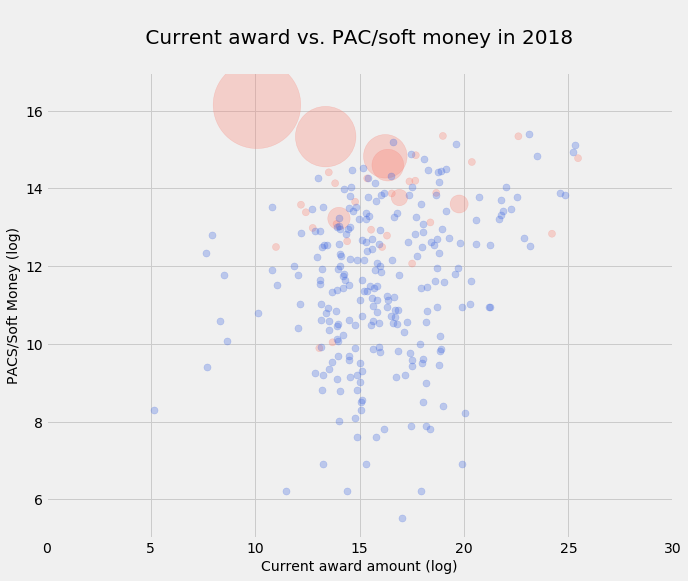

In [14]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

yr = 2018
d = input_data[input_data.year == yr]
soft_1 = d[d.soft_dummy == 1]
soft_0 = d[d.soft_dummy == 0]

ax.scatter(soft_1.current_award_scaled_log, soft_1.pacs_plus_softorgs_log, s=soft_1.soft_dummy_size, alpha=0.3, color='salmon')
ax.scatter(soft_0.current_award_scaled_log, soft_0.pacs_plus_softorgs_log, s=50, alpha=0.3, color='royalblue')
# ax.scatter(d.current_award_scaled_log, d.pacs_plus_softorgs_log, s=d.Soft_Orgs/500, alpha=0.5, color='royalblue')

ax.set_title(f'\n Current award vs. PAC/soft money in {yr} \n', size=20)
ax.set_ylabel('PACS/Soft Money (log)', size=14)
ax.set_xlabel('Current award amount (log)', size=14)

# plt.xlim(-0.2e10, 0.2e11)
ax.set_ylim([5,17])
ax.set_xlim([0, 30])
# ax.set_yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000])
# ax.set_yticklabels(['$0M','$1M','$2M','$3M','$4M','$5 million'])
# ax.set_xticklabels(['','$2.5 Billion','$5B','$7.5','$10B','$12.5B','$15B','$17.5B','$20B'])
plt.savefig(os.getcwd() + f'/img/current_award_vs_pac_soft_{yr}.png')

## Old plots (experimenting)

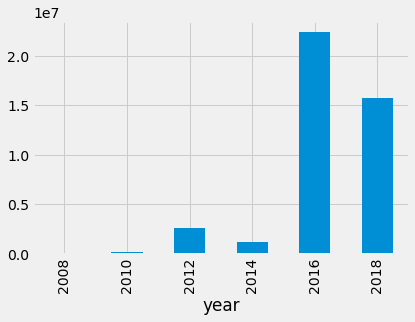

In [16]:
master_df.groupby('year')['Soft_Orgs'].sum().plot(kind='bar')

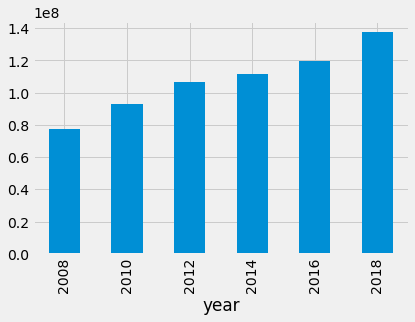

In [17]:
master_df.groupby('year')['PACs'].sum().plot(kind='bar')

#### Current award over time

In [18]:
top_100 = list(master_df.groupby('org_name_clean')['current_award'].sum().sort_values(ascending=False).reset_index()['org_name_clean'].values)[:100]
len(top_100)

100

In [19]:
yr_org_top100 = master_df[['year','org_name_clean','current_award', 'potential_award']]
yr_org_top100 = yr_org_top100[yr_org_top100.org_name_clean.isin(top_100)]
print(yr_org_top100.shape)
yr_org_top100.head()

(477, 4)


,year,org_name_clean,current_award,potential_award
4,2008,afognak native,4.654850e+08,1.040796e+09
6,2008,alliant techsystems,9.356992e+10,9.356763e+10
7,2008,american systems,5.958004e+06,1.502166e+06
8,2008,amerisourcebergen,1.671324e+08,1.679372e+08
12,2008,att,1.646339e+10,1.646354e+10


In [20]:
yr_org_top100[yr_org_top100.year == 2018]['current_award'].max()

yr_org_top100[yr_org_top100.current_award == yr_org_top100[yr_org_top100.year == 2018]['current_award'].max()]

,year,org_name_clean,current_award,potential_award
1214,2018,general dynamics,1.140000e+13,2.110000e+13


In [21]:
top_in_2018 = yr_org_top100[yr_org_top100.year == 2018]
top_in_2018.sort_values('current_award', ascending=False).head(8)

,year,org_name_clean,current_award,potential_award
1214,2018,general dynamics,1.140000e+13,2.110000e+13
1257,2018,lockheed martin,9.920000e+12,2.800000e+13
1143,2018,boeing,8.970000e+12,1.920000e+13
1234,2018,huntington ingalls industries,6.200000e+12,1.240000e+13
1233,2018,humana,4.760000e+12,9.300000e+12
1154,2018,centene,3.270000e+12,5.420000e+12
1311,2018,raytheon,1.590000e+12,7.330000e+12
1139,2018,bechtel,1.120000e+12,1.120000e+12


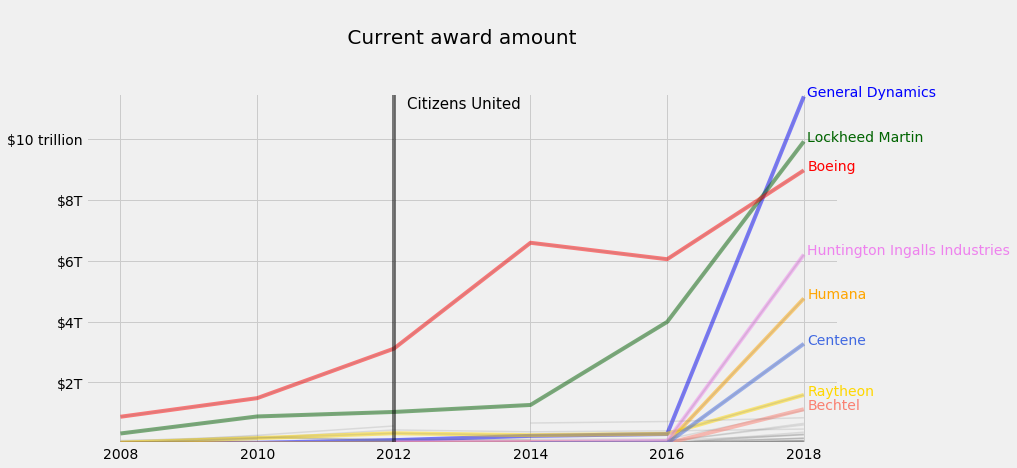

In [22]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

data = yr_org_top100.copy()
# top_8 = ['general dynamics', 'lockheed martin', 'boeing', 'huntington ingalls industries',
#          'humana', 'centene', 'raytheon', 'bechtel']

for org in list(data.org_name_clean.unique()):
    d = data[data.org_name_clean == org]
    if org == 'general dynamics':
        ax.plot(d.year, d.current_award, color='blue', alpha=0.5) 
        ax.text(d.year.tail(1)+.05, d.current_award.tail(1), d.org_name_clean.tail(1).values[0].title(), color='blue')
    if org == 'lockheed martin':
        ax.plot(d.year, d.current_award, color='darkgreen', alpha=0.5) 
        ax.text(d.year.tail(1)+.05, d.current_award.tail(1), d.org_name_clean.tail(1).values[0].title(), color='darkgreen')
    if org == 'boeing':
        ax.plot(d.year, d.current_award, color='red', alpha=0.5) 
        ax.text(d.year.tail(1)+.05, d.current_award.tail(1), d.org_name_clean.tail(1).values[0].title(), color='red')
    if org == 'huntington ingalls industries':
        ax.plot(d.year, d.current_award, color='violet', alpha=0.5) 
        ax.text(d.year.tail(1)+.05, d.current_award.tail(1), d.org_name_clean.tail(1).values[0].title(), color='violet')
    if org == 'humana':
        ax.plot(d.year, d.current_award, color='orange', alpha=0.5) 
        ax.text(d.year.tail(1)+.05, d.current_award.tail(1), d.org_name_clean.tail(1).values[0].title(), color='orange')
    if org == 'centene':
        ax.plot(d.year, d.current_award, color='royalblue', alpha=0.5) 
        ax.text(d.year.tail(1)+.05, d.current_award.tail(1), d.org_name_clean.tail(1).values[0].title(), color='royalblue')
    if org == 'raytheon':
        ax.plot(d.year, d.current_award, color='gold', alpha=0.5) 
        ax.text(d.year.tail(1)+.05, d.current_award.tail(1), d.org_name_clean.tail(1).values[0].title(), color='gold')
    if org == 'bechtel':
        ax.plot(d.year, d.current_award, color='salmon', alpha=0.5) 
        ax.text(d.year.tail(1)+.05, d.current_award.tail(1), d.org_name_clean.tail(1).values[0].title(), color='salmon')
    else:
        ax.plot(d.year, d.current_award, color='grey', alpha=0.2, linewidth=1.5)
    
ax.set_title('\n Current award amount \n\n', size=20)
ax.set_ylim([0,1.15e13])
# ax.set_ylabel('\n Current award \n', size=14)
plt.axvline(2012, color='black', alpha=0.5)
plt.text(2012.2, 1.1e13, "Citizens United", size=15)
ax.set_yticklabels(['','$2T','$4T','$6T','$8T','$10 trillion']);
# plt.annotate('\n Source: www.letour.fr \n', (0,0), (-50, -50), xycoords='axes fraction', textcoords='offset points', va='top', size=10)
# plt.savefig(os.getcwd() + '/img/08_country_counts_over_time.png')

#### PAC and Soft money pre- and post-Citizens United

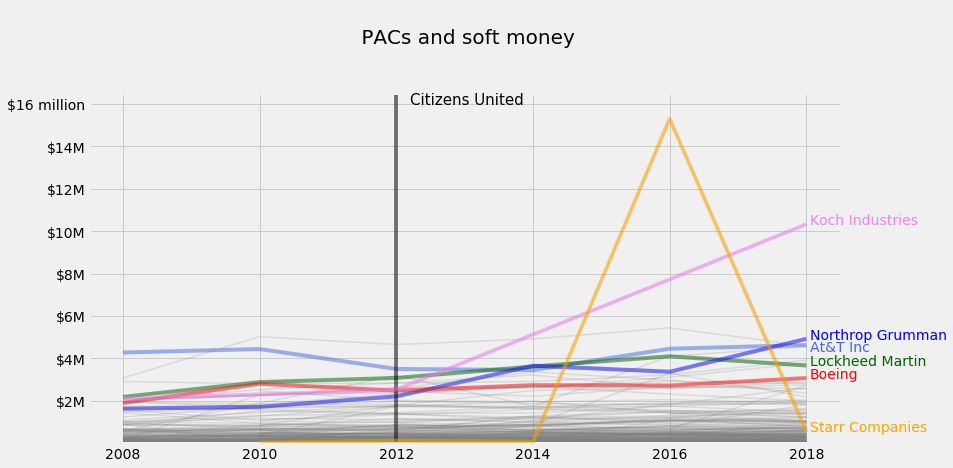

In [23]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

data = master_df.copy()
# top_8 = ['general dynamics', 'lockheed martin', 'boeing', 'huntington ingalls industries',
#          'humana', 'centene', 'raytheon', 'bechtel']

for org in list(data.org_name_clean.unique()):
    d = data[data.org_name_clean == org]
    if org == 'northrop grumman':
        ax.plot(d.year, d.pacs_plus_softorgs, color='blue', alpha=0.5) 
        ax.text(d.year.tail(1)+.05, d.pacs_plus_softorgs.tail(1), d.org_name_clean.tail(1).values[0].title(), color='blue')
    if org == 'lockheed martin':
        ax.plot(d.year, d.pacs_plus_softorgs, color='darkgreen', alpha=0.5) 
        ax.text(d.year.tail(1)+.05, d.pacs_plus_softorgs.tail(1), d.org_name_clean.tail(1).values[0].title(), color='darkgreen')
    if org == 'boeing':
        ax.plot(d.year, d.pacs_plus_softorgs, color='red', alpha=0.5) 
        ax.text(d.year.tail(1)+.05, d.pacs_plus_softorgs.tail(1), d.org_name_clean.tail(1).values[0].title(), color='red')
    if org == 'starr':
        ax.plot(d.year, d.pacs_plus_softorgs, color='orange', alpha=0.5, zorder=10) 
        ax.text(d.year.tail(1)+.05, d.pacs_plus_softorgs.tail(1), d.org_name.tail(1).values[0].title(), color='orange')
    if org == 'koch industries':
        ax.plot(d.year, d.pacs_plus_softorgs, color='violet', alpha=0.5, zorder=8) 
        ax.text(d.year.tail(1)+.05, d.pacs_plus_softorgs.tail(1), d.org_name_clean.tail(1).values[0].title(), color='violet')
    if org == 'att':
        ax.plot(d.year, d.pacs_plus_softorgs, color='royalblue', alpha=0.5) 
        ax.text(d.year.tail(1)+.05, d.pacs_plus_softorgs.tail(1)-0.03e7, d.org_name.tail(1).values[0].title(), color='royalblue')
#     if org == 'chevron':
#         ax.plot(d.year, d.pacs_plus_softorgs, color='gold', alpha=0.5) 
#         ax.text(d.year.tail(1)+.05, d.pacs_plus_softorgs.tail(1), d.org_name_clean.tail(1).values[0].title(), color='gold')
#     if org == 'bechtel':
#         ax.plot(d.year, d.pacs_plus_softorgs, color='salmon', alpha=0.5) 
#         ax.text(d.year.tail(1)+.05, d.pacs_plus_softorgs.tail(1), d.org_name_clean.tail(1).values[0].title(), color='salmon')
    else:
        ax.plot(d.year, d.pacs_plus_softorgs, color='grey', alpha=0.2, linewidth=1.5)
    
ax.set_title('\n PACs and soft money\n\n', size=20)# over time, by contractor \n', size=18)
ax.set_ylim([0,1.65e7])
plt.axvline(2012, color='black', alpha=0.5)
plt.text(2012.2, 1.6e7, "Citizens United", size=15)
ax.set_yticklabels(['','$2M','$4M','$6M','$8M','$10M','$12M','$14M','$16 million']);
# plt.savefig(os.getcwd() + '/img/08_country_counts_over_time.png')

#### Contributions to Dems vs. Republicans by contributors

In [24]:
master_df.head()

,recipient_parent_name1,recipient_name_clean,recipient_name,org_name_clean,org_name,current_award,potential_award,num_employees,annual_revenue,year,...,Republicans,PACs,Soft_Orgs,Total1,pacs_plus_softorgs,current_award_scaled,soft_dummy,current_award_scaled_log,pacs_plus_softorgs_log,soft_dummy_size
0,3MCOMPANY,3m,3M COMPANY,3m,3M CO,7.838262e+06,4.342798e+07,2.854455e+06,1.030000e+12,2008,...,257681,284404,0,438175,284404,7.838262e+04,0,11.269358,12.558151,50.0
1,ABBLTD,abb,ABB LTD,abb,ABB GROUP,3.163537e+05,3.163537e+05,2.164675e+04,6.203500e+09,2008,...,10850,18000,0,21536,18000,3.163537e+03,0,8.059446,9.798127,50.0
2,ABBOTTLABORATORIES,abbott laboratories,ABBOTT LABORATORIES,abbott laboratories,ABBOTT LABORATORIES,2.329304e+07,6.244787e+07,5.342950e+04,1.786237e+09,2008,...,709850,1028497,0,1285641,1028497,2.329304e+05,0,12.358495,13.843609,50.0
3,ADVANCEDACOUSTICCONCEPTSINC,advanced acoustic concepts,ADVANCED ACOUSTIC CONCEPTS INC.,advanced acoustic concepts,ADVANCED ACOUSTIC CONCEPTS,2.627054e+07,5.877078e+07,2.000000e+02,2.691478e+07,2008,...,23300,107600,0,142850,107600,2.627055e+05,0,12.478789,11.586176,50.0
4,AFOGNAKNATIVECORPORATION,afognak native,AFOGNAK NATIVE CORPORATION,afognak native,AFOGNAK NATIVE CORP,4.654850e+08,1.040796e+09,4.909336e+02,1.786700e+07,2008,...,3750,6000,0,9820,6000,4.654850e+06,0,15.353420,8.699515,50.0


In [25]:
demrep = master_df.groupby(['year'])['Democrats','Republicans'].mean().reset_index()
demrep = pd.melt(demrep, value_vars=['Democrats','Republicans'], id_vars=['year'])
demrep

,year,variable,value
0,2008,Democrats,340849.030928
1,2010,Democrats,260879.943231
2,2012,Democrats,267488.563786
3,2014,Democrats,236900.974684
4,2016,Democrats,340359.149378
5,2018,Democrats,304669.772563
6,2008,Republicans,330964.041237
7,2010,Republicans,266553.799127
8,2012,Republicans,414315.427984
9,2014,Republicans,362347.430380


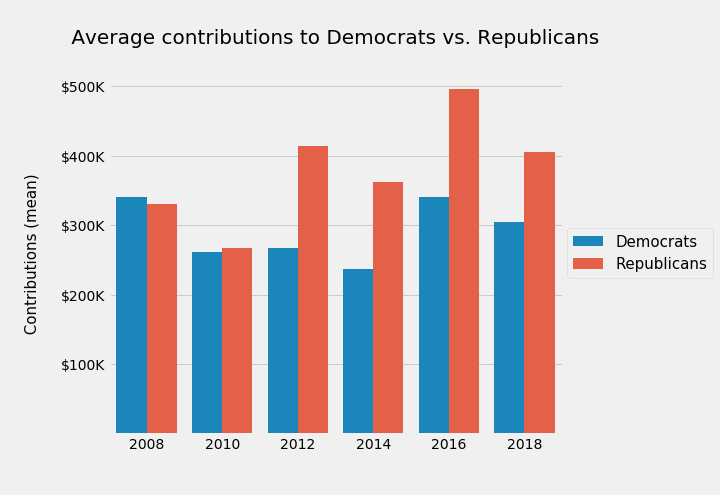

In [26]:
f = sns.catplot(x='year', y='value', hue='variable', data=demrep, kind='bar', height=6, aspect=1.3, legend=False)
plt.title('\n Average contributions to Democrats vs. Republicans \n', size=20)
plt.xlabel('\n ', size=15)
plt.ylabel('\n Contributions (mean) \n', size=15)
f.set_yticklabels(['','$100K','$200K','$300K','$400K','$500K'])
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), fontsize=15)
# plt.savefig(os.getcwd() + '/img/08_country_counts_over_time.png')

#### Means diff histograms

In [27]:
fc_df = pd.read_csv('flatiron_mod3proj/master_fc.csv')
print(fc_df.shape)
fc_df.head()

(24637, 36)


,Unnamed: 0,recipient_name_clean,current_award_x,potential_award_x,offers_received_x,num_employees_x,annual_revenue_x,award_count_x,recipient_name_x,organizational_type_x,...,Republicans,Soft_Indivs,Soft_Orgs,Total,Total1,org_id,org_name,org_name_clean,DemShare,RepShare
0,0,180s,10808156.40,10808156.40,21.0,4.000000e+01,0.000000e+00,1.0,180S INC.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020,12226118.01,39781218.03,9.0,1.441333e+03,1.260492e+08,1.0,2020 COMPANY LLC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3 phoenix,99966.57,99967.00,2.0,2.300000e+01,3.427000e+06,1.0,3 PHOENIX INC.,CORPORATE NOT TAX EXEMPT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3m,7838262.46,43427979.83,18310.0,2.854455e+06,1.030003e+12,1.0,3M COMPANY,NaN,...,257681.0,0.0,0.0,438175.0,438175.0,D000021800,3M CO,3m,0.411922,0.588078
4,4,a2z,150000.00,150000.00,2.0,0.000000e+00,0.000000e+00,1.0,A2Z INC.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
cc_df = pd.read_csv('flatiron_mod3proj/master_cc.csv')
print(cc_df.shape)
cc_df.head()

(41191, 43)


,Unnamed: 0,Unnamed: 0.1,% to Dems,% to Repubs,0,1,Cycle_x,Democrats_x,Individuals_x,PACs_x,...,PACs_y,Republicans_y,Soft_Indivs,Soft_Orgs,Total_y,Total1,org_id_y,org_name_y,DemShare,RepShare
0,0,3,61%,39%,NaN,NaN,1998,1005124,478511,411290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4,67%,33%,NaN,NaN,1996,1766279,368191,308875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,73%,27%,NaN,NaN,1994,406924,103070,216370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6,45%,55%,NaN,NaN,1992,497470,118285,258250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7,72%,28%,NaN,NaN,1990,165400,71850,157025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
soft_postCU = fc_df.loc[(fc_df['year']>2011),'Soft_Orgs'].dropna()

In [30]:
soft_preCU = fc_df.loc[(fc_df['year']<=2011),'Soft_Orgs'].dropna()

In [31]:
PAC_postCU = fc_df.loc[(fc_df['year']>2011),'PACs'].dropna()

In [32]:
PAC_preCU = fc_df.loc[(fc_df['year']<=2011),'PACs'].dropna()

In [33]:
sPAC_postCU = soft_postCU + PAC_postCU

In [34]:
sPAC_preCU = soft_preCU + PAC_preCU

In [35]:
sPAC_postCU[:5]

4719     319000.0
4720      33000.0
4735       5500.0
4736    1389750.0
4813      11500.0
dtype: float64

Text(0, 0.5, 'Count')

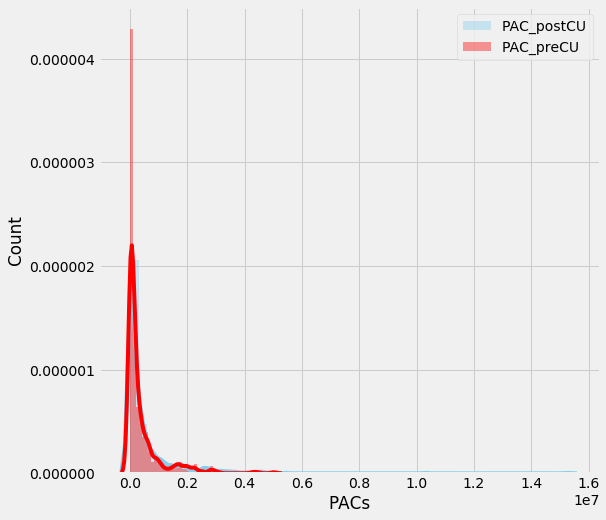

In [36]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
sns.distplot(sPAC_postCU , color="skyblue", label="High")
sns.distplot(sPAC_preCU , color="red", label="Low")

ax.legend(['PAC_postCU', 'PAC_preCU'])

# ax.set(xlim=(0, 350))
ax.set_xlabel('PACs')
ax.set_ylabel('Count')
#plt.legend(fontsize='medium', title_fontsize='20')
# plt.title('Density Distribution of Worldwide Gross Box Office by Domestic vs Globally Distributed Films')


## Exploring propensity score matching

In [54]:
fc_df_dropna = pd.read_csv('flatiron_mod3proj/fc_df_dropna.csv')

In [55]:
print(fc_df_dropna.shape)
fc_df_dropna.head()

(24766, 38)


,Unnamed: 0,recipient_parent_name1_x,current_award_x,potential_award_x,offers_received_x,num_employees_x,annual_revenue_x,award_count_x,recipient_name_x,organizational_type_x,...,Individuals,PACs,Republicans,Soft (Indivs),Soft (Orgs),Total,org_id,org_name,org_name_clean,treated
0,0,180SINC,10808156.40,10808156.40,21.0,4.000000e+01,0.000000e+00,1.0,180S INC.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,2020COMPANYLLC,12226118.01,39781218.03,9.0,1.441333e+03,1.260492e+08,1.0,2020 COMPANY LLC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,3MCOMPANY,7838262.46,43427979.83,18310.0,2.854455e+06,1.030003e+12,1.0,3M COMPANY,NaN,...,"$154,571","$284,404","$257,681",$0,$0,"$439,575",D000021800,3M CO,3m,1
3,3,3PHOENIXINC,99966.57,99967.00,2.0,2.300000e+01,3.427000e+06,1.0,3 PHOENIX INC.,CORPORATE NOT TAX EXEMPT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,A2ZINC,150000.00,150000.00,2.0,0.000000e+00,0.000000e+00,1.0,A2Z INC.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [56]:
fc_df_dropna.groupby('treated').size()

treated
0    23322
1     1444
dtype: int64

In [57]:
fc_df_dropna['treated'] = 0
fc_df_dropna.loc[fc_df_dropna['recipient_parent_name1_y'].isnull() == False, 'treated'] = 1

In [58]:
fc_df_dropna.groupby('treated').size()

treated
0    23322
1     1444
dtype: int64

In [59]:
var = ['current_award_x', 'num_employees_x', 'annual_revenue_x']

propensity = LogisticRegression()
propensity = propensity.fit(fc_df_dropna[var], fc_df_dropna.treated)
pscore = propensity.predict_proba(fc_df_dropna[var])[:, 1]
print(pscore[:5])

fc_df_dropna['Propensity'] = pscore

[0.50000013 0.50000042 0.50238337 0.50000001 0.5       ]


c:\users\joey\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
fc_df_dropna = fc_df_dropna[['current_award_x', 'num_employees_x', 'annual_revenue_x', 'treated', 'Propensity']]

In [61]:
def Match(groups, propensity, caliper = 0.05):
    ''' 
    Inputs:
    groups = Treatment assignments.  Must be 2 groups
    propensity = Propensity scores for each observation. Propensity and groups should be in the same order (matching indices)
    caliper = Maximum difference in matched propensity scores. For now, this is a caliper on the raw
            propensity; Austin reccommends using a caliper on the logit propensity.
    
    Output:
    A series containing the individuals in the control group matched to the treatment group.
    Note that with caliper matching, not every treated individual may have a match.
    '''

    # Check inputs
    if any(propensity <=0) or any(propensity >=1):
        raise ValueError('Propensity scores must be between 0 and 1')
    elif not(0<caliper<1):
        raise ValueError('Caliper must be between 0 and 1')
    elif len(groups)!= len(propensity):
        raise ValueError('groups and propensity scores must be same dimension')
    elif len(groups.unique()) != 2:
        raise ValueError('wrong number of groups')
        
        
    # Code groups as 0 and 1
    groups = groups == groups.unique()[0]
    N = len(groups)
    N1 = groups.sum(); N2 = N-N1
    g1, g2 = propensity[groups == 1], (propensity[groups == 0])
    # Check if treatment groups got flipped - treatment (coded 1) should be the smaller
    if N1 > N2:
        N1, N2, g1, g2 = N2, N1, g2, g1
        print(N1, N2, g1, g2)
        
        
    # Randomly permute the smaller group to get order for matching
    np.random.seed(7) ### COMMENT OUT LATER!!!!
    morder = np.random.permutation(N1)
    matches = pd.Series(np.empty(N1))
    matches[:] = np.NAN
    
    for m in morder:
        dist = abs(g1[m] - g2)
        if dist.min() <= caliper:
            matches[m] = dist.argmin()
            g2 = g2.drop(matches[m])
    return (matches)

In [62]:
groups = fc_df_dropna.treated == fc_df_dropna.treated.unique()[0]
N = len(groups)
N1 = groups.sum(); N2 = N-N1
g1, g2 = fc_df_dropna.Propensity[groups == 1], (fc_df_dropna.Propensity[groups == 0])

In [63]:
groups = fc_df_dropna.treated == fc_df_dropna.treated.unique()[0]
N = len(groups)
N1 = groups.sum(); N2 = N-N1
g1, g2 = fc_df_dropna.Propensity[groups == 1], (fc_df_dropna.Propensity[groups == 0])
# Check if treatment groups got flipped - treatment (coded 1) should be the smaller
if N1 > N2:
    N1, N2, g1, g2 = N2, N1, g2, g1

In [64]:
np.random.seed(7) ### COMMENT OUT LATER!!!!
morder = np.random.permutation(N1)
matches = pd.Series(np.empty(N1))
matches[:] = np.NAN

In [65]:
g1.loc[795:805]
# g1[4523]
# g2.loc[4530:]

801    0.500002
Name: Propensity, dtype: float64

In [66]:
list(morder[:10])

[795, 562, 1306, 571, 1356, 610, 1141, 609, 389, 71]

In [67]:
for m in morder:
    dist = abs(g1[m] - g2)

KeyError: 795

In [68]:
stuff = Match(fc_df_dropna.treated, fc_df_dropna.Propensity)
# g1, g2 = fc_df_dropna.Propensity[fc_df_dropna.treated==1], fc_df_dropna.Propensity[fc_df_dropna.treated==0]

1444 23322 2        0.502383
9        0.500014
10       0.500004
33       0.500000
35       0.500000
54       0.500006
65       0.500005
75       0.500001
78       0.500005
80       0.500002
87       0.501158
114      0.500001
119      0.500002
123      0.500000
137      0.500000
138      0.500000
170      0.500342
181      0.500468
184      0.500001
190      0.500003
192      0.500000
198      0.500003
207      0.500028
238      0.500002
244      0.500008
252      0.500000
253      0.500003
272      0.500001
287      0.500008
299      0.500037
           ...   
24023    0.500068
24028    0.500030
24068    0.500004
24100    0.500548
24112    0.500014
24114    0.500002
24153    0.500003
24201    0.500010
24202    0.500082
24251    0.500087
24263    0.500023
24278    0.500173
24295    0.500065
24300    0.504629
24356    0.500106
24358    0.500002
24384    0.500019
24392    0.500006
24406    0.500006
24416    0.500043
24440    0.500006
24444    0.500419
24487    0.500097
24570    0.500029

KeyError: 795

In [69]:
# list(zip(g1, g2[stuff]))

#### Replicating Kellie Otto's code

In [70]:
names = ['Treated', 'Age', 'Education', 'Black', 'Hispanic', 'Married',
         'Nodegree', 'RE74', 'RE75', 'RE78']
treated = pd.read_table('nswre74_treated.txt', sep = '\s+',
                        header = None, names = names)
control = pd.read_table('nswre74_control.txt', sep='\s+', 
                        header = None, names = names)
data = pd.concat([treated, control])
data.head()

c:\users\joey\learn-env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.
c:\users\joey\learn-env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead.
  


,Treated,Age,Education,Black,Hispanic,Married,Nodegree,RE74,RE75,RE78
0,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,9930.0460
1,1.0,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,3595.8940
2,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,24909.4500
3,1.0,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,7506.1460
4,1.0,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,289.7899


In [71]:
data.groupby('Treated').size()

Treated
0.0    260
1.0    185
dtype: int64

In [72]:
propensity = LogisticRegression()
propensity = propensity.fit(data[names[1:-1]], data.Treated)
pscore = propensity.predict_proba(data[names[1:-1]])[:,1] # The predicted propensities by the model
print(pscore[:5])

data['Propensity'] = pscore

[0.42717414 0.25618188 0.54874962 0.37387294 0.40218132]


c:\users\joey\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
stuff = Match(data.Treated, data.Propensity)
g1, g2 = data.Propensity[data.Treated==1], data.Propensity[data.Treated==0]
# test ValueError
#badtreat = data.Treated + data.Hispanic
#Match(badtreat, pscore)
stuff[:5]

c:\users\joey\learn-env\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


0    116.0
1    213.0
2     75.0
3    122.0
4    210.0
dtype: float64

In [74]:
list(zip(g1, g2[stuff]))

[(0.42717414100885565, 0.40955870756427737),
 (0.2561818848271543, 0.25485145890649635),
 (0.5487496188874784, 0.5487496188874784),
 (0.3738729397499026, 0.3742482542922399),
 (0.402181324943938, 0.40255363347399903),
 (0.3734170341470823, 0.3734170341470823),
 (0.5330193637839838, nan),
 (0.3845245676495978, 0.3845245676495978),
 (0.5091529993758608, 0.5177095972445172),
 (0.6179595624387534, 0.5846559387170204),
 (0.3670867142419881, 0.3670867142419881),
 (0.5231132662860947, 0.5234156557078232),
 (0.3700192228588309, 0.3700192228588309),
 (0.4104176824744372, 0.41048734010898413),
 (0.3729613533297289, 0.3733118581120432),
 (0.36207108597102616, 0.36207108597102616),
 (0.5366389497460697, 0.5397707907215271),
 (0.37047343284677087, 0.37047343284677087),
 (0.5710459440420819, 0.5709674057278171),
 (0.5397707907215271, nan),
 (0.36543824880978326, 0.36543824880978326),
 (0.5934502784071405, 0.5798852183241857),
 (0.4387082632413581, 0.44246967191501074),
 (0.3675394246256881, 0.366940